Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Load the CIFAR-10 dataset (a standard image classification dataset)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1] (helps in training stability)
X_train, X_test = X_train / 255.0, X_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Convert class labels to one-hot encoding

In [4]:
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

Define a CNN Model

In [5]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Dropout as a regularization technique
        Dense(10, activation='softmax')  # 10 classes in CIFAR-10
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Implement Early Stopping

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Train CNN with Early Stopping

In [7]:
model = create_cnn_model()
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.3128 - loss: 1.8593 - val_accuracy: 0.5389 - val_loss: 1.2938
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.5085 - loss: 1.3784 - val_accuracy: 0.6059 - val_loss: 1.1335
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.5666 - loss: 1.2187 - val_accuracy: 0.6309 - val_loss: 1.0512
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 83ms/step - accuracy: 0.6127 - loss: 1.1015 - val_accuracy: 0.6546 - val_loss: 0.9861
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.6335 - loss: 1.0423 - val_accuracy: 0.6711 - val_loss: 0.9389
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.6554 - loss: 0.9803 - val_accuracy: 0.6868 - val_loss: 0.9000
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.6683 - loss: 0.9414 - val_accuracy: 0.6906 - val_loss: 0.8915
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.6767 - loss: 0.9151 - 

Plot Training and Validation Loss

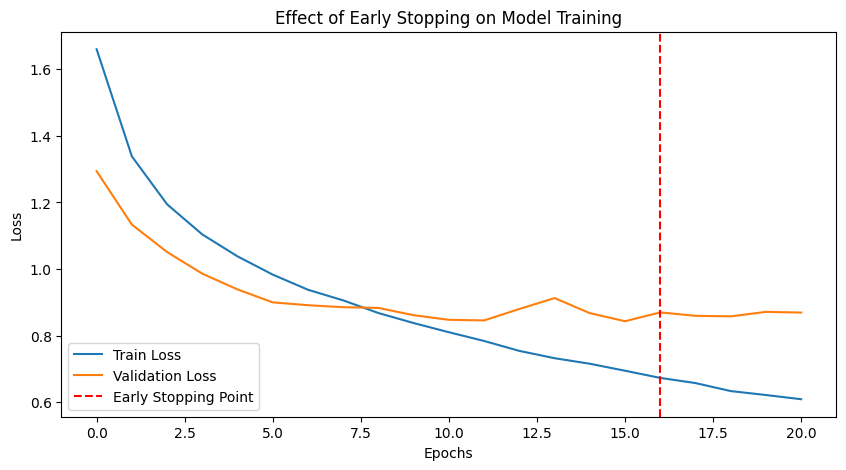

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=len(history.history['loss']) - early_stopping.patience, linestyle='--', color='r', label='Early Stopping Point')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Effect of Early Stopping on Model Training')
plt.show()


- Early Stopping monitors validation loss and stops training if it stops improving.
- This prevents overfitting, ensuring the model does not memorize the training data.
- Dropout further helps in regularization by randomly dropping neurons during training.


    Early Stopping Formula:
    Loss = L(w) + lambda * ||w||^2  (where lambda controls regularization strength)
    Stopping Condition: If val_loss does not improve for 'patience' epochs, training stops.